Nama : Muhammad Hanif Fadhlurrahman

NIM : 5312422027

Prodi : Teknik Komputer

In [1]:
# Mengimpor pustaka yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

# Mengatur ukuran font
FONT_SMALL = 12
FONT_MEDIUM = 14

# Mengatur ukuran font pada berbagai elemen plot
plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

# Mengaktifkan plotting di notebook secara langsung
%matplotlib inline

<ipython-input-2-e9552be68a41>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y1, use_line_collection=True, basefmt='C0')


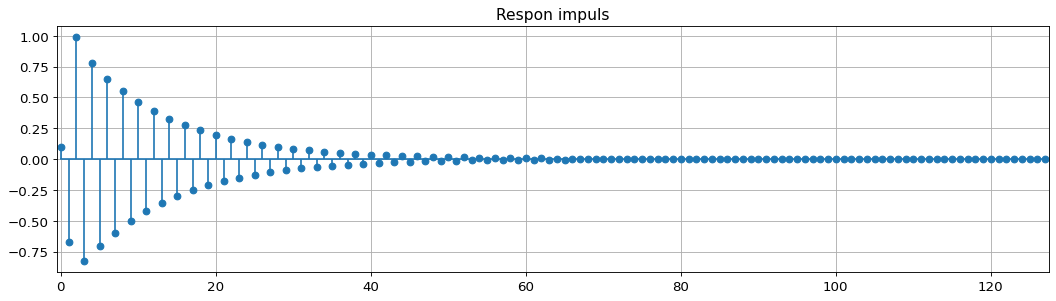

In [2]:
# Panjang sinyal
N = 128

# Delta-function
x = np.zeros(N)
x[0] = 1

# Definisi koefisien filter
b = [0.1, -0.6, 0.5]  # Koefisien numerator
a = [1, 0.7, -0.2]    # Koefisien denominator

# Proses filtering sinyal input
y1 = lfilter(b, a, x)

# Plot impulse response
plt.figure(figsize=(16, 4), dpi=80)
plt.title('Respon impuls')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Pada gambar diatas, grafik berjudul "Respon Impuls" yang menunjukkan bagaimana sesuatu merespons terhadap impuls dari waktu ke waktu. Beberapa elemen penting dari grafik ini adalah:

1. **Sumbu X (horizontal)**: Ini merepresentasikan waktu, dengan satuan yang tidak ditentukan (bisa detik, milidetik, atau lainnya), dari 0 hingga sekitar 125.
2. **Sumbu Y (vertikal)**: Ini merepresentasikan amplitudo respons, berkisar dari -1.0 hingga 1.0.
3. **Titik-titik biru**: Setiap titik pada grafik menunjukkan nilai respons pada titik waktu tertentu. Titik-titik ini membentuk pola yang berosilasi di sekitar nilai nol, dengan amplitudo yang secara bertahap menurun.

Menginterpretasikan lebih detail:
- Grafik ini menunjukkan bahwa respons awal adalah yang terbesar, dan kemudian berosilasi bolak-balik mendekati nol.
- Amplitudo osilasi menurun secara bertahap, menunjukkan bahwa setelah beberapa waktu, sistem menstabilkan kembali ke kondisi netral (amplitudo nol).



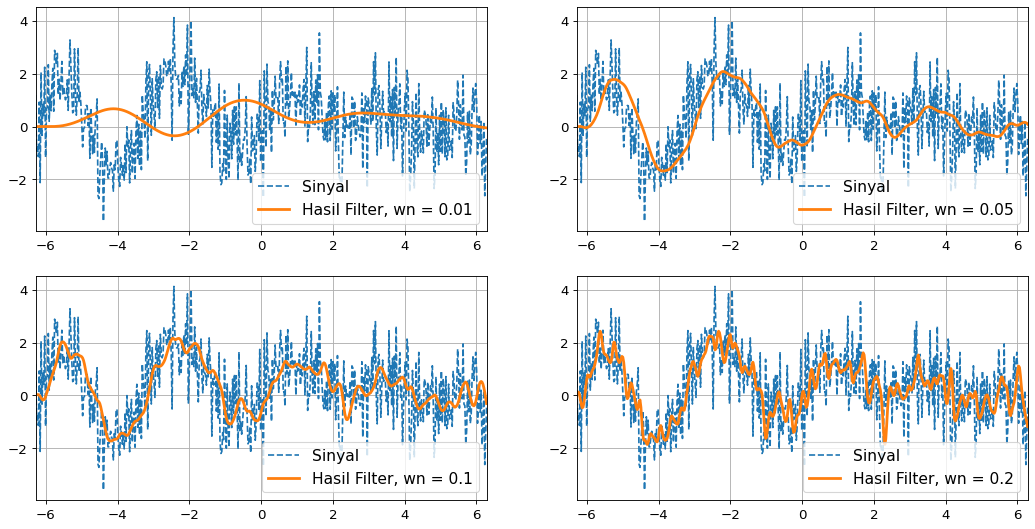

In [3]:
# Membuat sinyal input
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Menambahkan noise putih
np.random.seed(1)
xn = x + np.random.randn(len(t))

# Filter lowpass Butterworth orde-3
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

# Daftar frekuensi cut-off yang akan diuji
wn = [0.01, 0.05, 0.1, 0.2]

# Menghitung filter IIR
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot hasil
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Sinyal', 'Hasil Filter, wn = {}'.format(wn[i])), loc='lower right')

Gambar tersebut menampilkan empat plot yang disusun dalam tata letak grid 2x2. Setiap plot mengilustrasikan contoh pemrosesan sinyal, menunjukkan bagaimana jendela filter yang berbeda mempengaruhi sinyal.

1. **Plot Kiri Atas:**
   - **Judul/Label:**
     - Sumbu x berkisar dari -6 hingga 6.
     - Sumbu y berkisar dari -3 hingga 3.
     - Legenda mencakup "Sinyal" dan "Hasil Filter, wn = 0.01" (Hasil Filter, ukuran jendela = 0.01).
   - **Konten:**
     - Garis putus-putus biru mewakili sinyal asli.
     - Garis solid orange menunjukkan hasil penyaringan sinyal dengan ukuran jendela 0.01.

2. **Plot Kanan Atas:**
   - **Judul/Label:**
     - Sumbu x berkisar dari -6 hingga 6.
     - Sumbu y berkisar dari -3 hingga 3.
     - Legenda mencakup "Sinyal" dan "Hasil Filter, wn = 0.05" (Hasil Filter, ukuran jendela = 0.05).
   - **Konten:**
     - Garis putus-putus biru mewakili sinyal asli.
     - Garis solid orange menunjukkan hasil penyaringan sinyal dengan ukuran jendela 0.05.

3. **Plot Kiri Bawah:**
   - **Judul/Label:**
     - Sumbu x berkisar dari -6 hingga 6.
     - Sumbu y berkisar dari -3 hingga 3.
     - Legenda mencakup "Sinyal" dan "Hasil Filter, wn = 0.1" (Hasil Filter, ukuran jendela = 0.1).
   - **Konten:**
     - Garis putus-putus biru mewakili sinyal asli.
     - Garis solid orange menunjukkan hasil penyaringan sinyal dengan ukuran jendela 0.1.

4. **Plot Kanan Bawah:**
   - **Judul/Label:**
     - Sumbu x berkisar dari -6 hingga 6.
     - Sumbu y berkisar dari -3 hingga 3.
     - Legenda mencakup "Sinyal" dan "Hasil Filter, wn = 0.2" (Hasil Filter, ukuran jendela = 0.2).
   - **Konten:**
     - Garis putus-putus biru mewakili sinyal asli.
     - Garis solid orange menunjukkan hasil penyaringan sinyal dengan ukuran jendela 0.2.

**Observasi Umum:**
- Pada semua plot, sinyal asli (garis putus-putus biru) tetap sama.
- Efek penyaringan (garis solid orange) menghaluskan sinyal dengan tingkat yang berbeda, menunjukkan peningkatan penghalusan seiring dengan ukuran jendela (wn) yang meningkat dari 0.01 hingga 0.2.




In [4]:
# Panjang sinyal delta
N = 40

# Membuat delta-function
x = np.zeros(N)
x[0] = 1

# Orde filter - M
M = 16

# Sinyal input
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

# Filtering dengan filter FIR
y1 = lfilter(b, a, x)

# Mengubah ke bentuk rekursif
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]

# Filtering dengan filter IIR rekursif
y2 = lfilter(b, a, x)

# Memeriksa perbedaan
np.all(y1 == y2)

True

<ipython-input-5-aab3cf75e35e>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y2, use_line_collection=True, basefmt='C0')


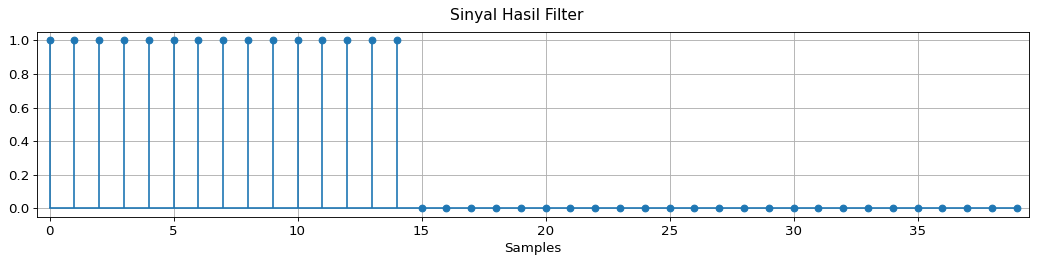

In [5]:
# Mengatur ukuran plot
plt.figure(figsize=(16, 3), dpi=80)

# Plot sinyal hasil filtering dengan stem plot
plt.stem(y2, use_line_collection=True, basefmt='C0')

# Menyesuaikan batas sumbu x
plt.xlim([-0.5, N-0.5])

# Menambah label sumbu x
plt.xlabel('Samples')

# Menambah judul keseluruhan plot
plt.suptitle('Sinyal Hasil Filter')

# Menambah grid
plt.grid(True)

Gambar diatas adalah grafik yang berjudul "Sinyal Hasil Filter." Grafik tersebut menampilkan sinyal yang telah difilter, dengan sumbu horizontal (x) mewakili "Samples" (sampel) dan sumbu vertikal (y) mewakili amplitudo sinyal.

Berikut adalah beberapa penjelasan terkait gambar tersebut:

1. **Judul Grafik:**
   - Judul grafik adalah "Sinyal Hasil Filter," yang menunjukkan bahwa grafik ini menampilkan hasil dari suatu proses filtrasi sinyal.

2. **Sumbu X (Horizaontal):**
   - Sumbu x diberi label "Samples," yang mengindikasikan jumlah sampel yang diambil dari sinyal dalam domain waktu.

3. **Sumbu Y (Vertikal):**
   - Sumbu y menunjukkan amplitudo dari sinyal setelah difilter. Nilai amplitudo berkisar dari 0 hingga 1.

4. **Bentuk Grafik:**
   - Dari sample 0 hingga sekitar 15, amplitudo sinyal berada pada nilai 1.0, menunjukkan bahwa sinyal mungkin konstan tinggi pada bagian awal ini.
   - Setelah sample 15, amplitudo sinyal turun mendekati nol dan tetap rendah hingga akhir grafik. Hal ini menunjukkan bahwa filter telah menghilangkan atau menekan sinyal setelah titik ini.

5. **Interpretasi Umum:**
   - Grafik ini mungkin menunjukkan hasil dari filter yang memotong sinyal setelah sampel ke-15. Hal ini bisa menjadi hasil dari filter low-pass atau high-pass atau jenis filter lainnya yang diterapkan pada sinyal input.



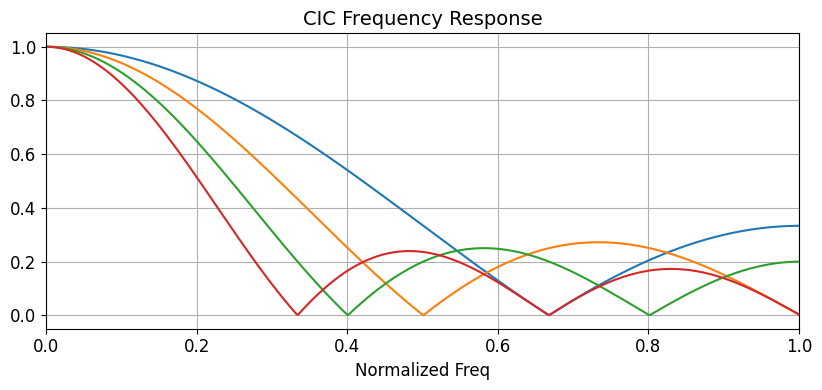

In [6]:
# Jumlah titik FFT
N = 512

# Generate frequency vector
f = np.linspace(0, 1, N, endpoint=True)

# Koefisien filter CIC
b = [1, 1, 1]

# Membuat plot
plt.figure(figsize=(16, 4))

# Plot frekuensi respons CIC untuk beberapa tingkat filter
plt.subplot(1, 2, 1)
for i in range(4):
    # Menghitung respons frekuensi
    _, h = freqz(b, N)
    h = np.abs(h)

    # Normalisasi respons frekuensi dan plot
    plt.plot(f, h/np.max(h))

    # Menyesuaikan batas sumbu x
    plt.xlim([0, 1])

    # Menambah grid
    plt.grid(True)

    # Menambah koefisien baru untuk filter CIC
    b.append(1)

# Menambah label sumbu x
plt.xlabel('Normalized Freq')

# Menambah judul plot
plt.title('CIC Frequency Response')

# Menyesuaikan tata letak
plt.tight_layout()

Gambar ini adalah grafik yang menunjukkan **Respons Frekuensi Komponen Integrator Cascaded (CIC)**. Grafik tersebut menggambarkan bagaimana respon frekuensi dari filter CIC berubah seiring dengan frekuensi normalisasi.

Berikut adalah penjelasan rinci mengenai elemen-elemen gambar ini:
- **Judul Grafik:** "CIC Frequency Response" menunjukkan bahwa yang digambarkan adalah respons frekuensi dari filter CIC.
- **Sumbu-Y:** Menampilkan magnitude atau besarannya, berkisar dari 0 hingga 1. Magnitude ini menunjukkan seberapa banyak frekuensi tersebut diredam atau diteruskan oleh filter CIC.
- **Sumbu-X:** Menampilkan frekuensi yang dinormalisasi, berkisar dari 0 hingga 1. Frekuensi yang dinormalisasi berarti frekuensi yang telah disesuaikan berdasarkan frekuensi sampel maksimum sistem.
- **Garis Bergelombang:** Mewakili respons frekuensi dari filter CIC pada beberapa tingkat decimation atau perulangan filter yang berbeda. Semakin banyak tahapan decimation, semakin tajam penurunan respons frekuensinya.


<ipython-input-7-ba379a43a8cb>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(taps, use_line_collection=True, basefmt='C0')


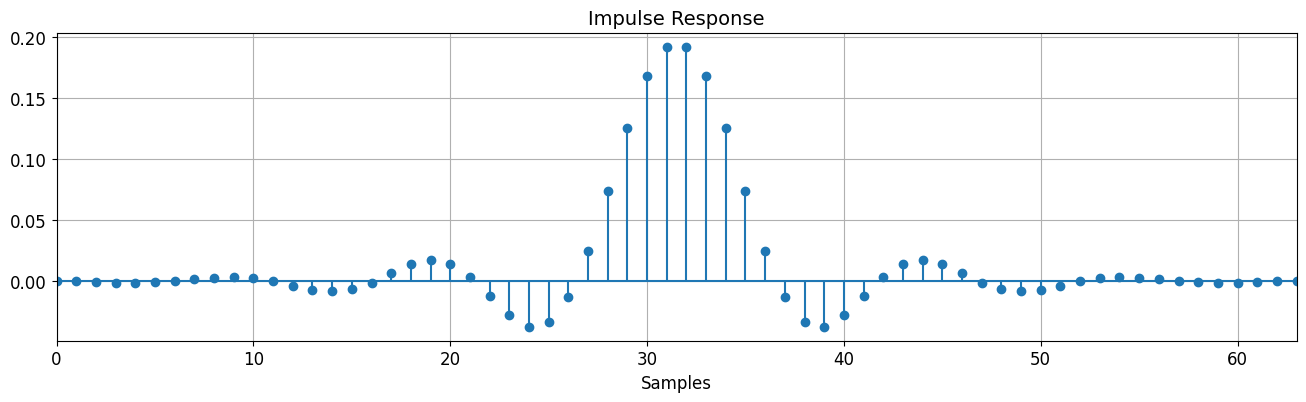

In [7]:
# Jumlah titik FFT
N = 100

# Daftar frekuensi
lst_freqs = np.linspace(0, 1, N)

# Daftar gain
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# Taps filter FIR
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

# Membuat plot
plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse Response')

# Plot taps filter FIR dengan stem plot
plt.stem(taps, use_line_collection=True, basefmt='C0')

# Menyesuaikan batas sumbu x
plt.xlim([0, NFIR-1])

# Menambah label sumbu x
plt.xlabel('Samples')

# Menambah grid
plt.grid(True)

Gambar tersebut merupakan grafik respons impuls. Berikut adalah penjelasan mengenai beberapa elemen penting pada grafik:

1. **Judul**: Grafik ini diberi judul "Impulse Response" yang menunjukkan bahwa grafik ini menggambarkan respons impuls dari suatu sistem (biasanya dalam domain waktu).

2. **Sumbu X (Horizontal)**: Label "Samples" menunjukkan bahwa sumbu ini merepresentasikan sampel-sampel dalam domain waktu. Tiap titik pada sumbu ini mewakili suatu waktu atau indeks sampel tertentu.

3. **Sumbu Y (Vertikal)**: Nilai pada sumbu ini menunjukkan amplitude atau besar dari respons impuls pada sampel tersebut. Amplitudonya berkisar dari sekitar 0 hingga 0.20.

4. **Titik Data**: Titik-titik data pada grafik ini menunjukkan nilai amplitude dari respons sistem terhadap impuls pada setiap sampelnya. Grafik ini menunjukkan bahwa sebagian besar nilai amplitude berada di sekitar nol kecuali pada bagian tengah yang memiliki beberapa nilai yang cukup signifikan.

5. **Bentuk Grafik**: Bentuk grafik menunjukkan bahwa sistem memiliki respons impuls dengan amplitudo puncak di tengah diikuti oleh nilai-nilai kecil pada sampel sebelumnya dan sesudahnya. Ini umumnya menunjukkan karakteristik dari filter atau sistem linear.


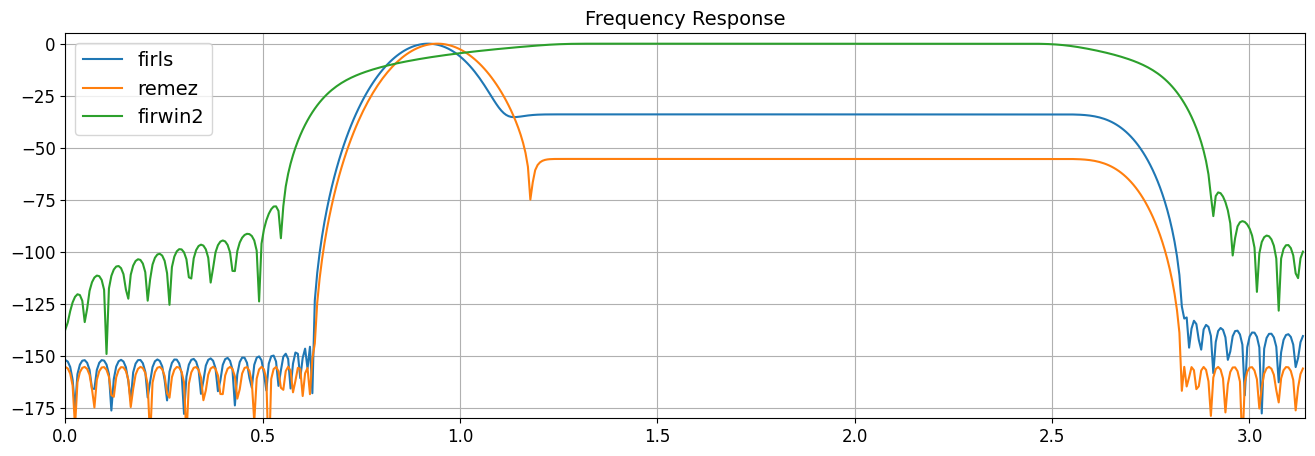

In [8]:
# Parameter masukan
fs = 10  # Frekuensi sampling
N = 117  # Jumlah koefisien filter FIR yang diinginkan
desired = (0, 0, 1, 1, 0, 0)  # Respon filter yang diinginkan
bands = (0, 1, 2, 4, 4.5, 5)  # Batas frekuensi

# Filter FIR menggunakan metode firls, remez, dan firwin2
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# Plot hasil dan hitung FFT
plt.figure(figsize=(16, 5))
plt.title('Frequency Response')

# Loop untuk setiap filter FIR
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))

# Menyesuaikan batas sumbu x dan y
plt.xlim([0, np.pi])
plt.ylim([-180, 5])

# Menambah legenda
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')

# Menambah grid
plt.grid(True)

Gambar ini menunjukkan respons frekuensi dari tiga filter digital yang berbeda. Berikut adalah penjelasan rinci mengenai respons frekuensi yang ditampilkan:

1. **Sumbu Horizontal (x-axis)**: Mewakili frekuensi normalisasi (dalam satuan $\pi$ rad/sample), yang biasanya dinyatakan dalam rentang dari 0 hingga $\pi$ (atau dari 0 hingga 1.0 dalam nilai normalisasi).

2. **Sumbu Vertikal (y-axis)**: Mewakili amplitudo (dalam dB) dari respons frekuensi filter. Nilai amplitudo menunjukkan seberapa kuat atau lemah sinyal pada frekuensi tertentu akan dilewati oleh filter.

3. **Garis Hijau Tua (firls)**: Mewakili respons frekuensi dari filter yang dirancang menggunakan metode "Least Squares Linear Phase FIR". Filter ini menunjukkan karakteristik filter pita yang lebar, dengan sebagian besar frekuensi di tengah rentang memiliki amplifikasi yang relatif konstan.

4. **Garis Biru (remez)**: Mewakili respons frekuensi dari filter yang dirancang menggunakan metode "Parks-McClellan Optimal FIR". Filter ini juga menunjukkan karakteristik pita yang lebar, namun dengan peredaman yang lebih signifikan di luar rentang pita lulus (passband).

5. **Garis Jingga (firwin2)**: Mewakili respons frekuensi dari filter yang dirancang menggunakan metode "Window Method FIR". Filter ini menunjukkan karakteristik yang mirip dengan filter lainnya, tetapi dengan penurunan amplitudo yang lebih drastis di luar rentang pita lulus.



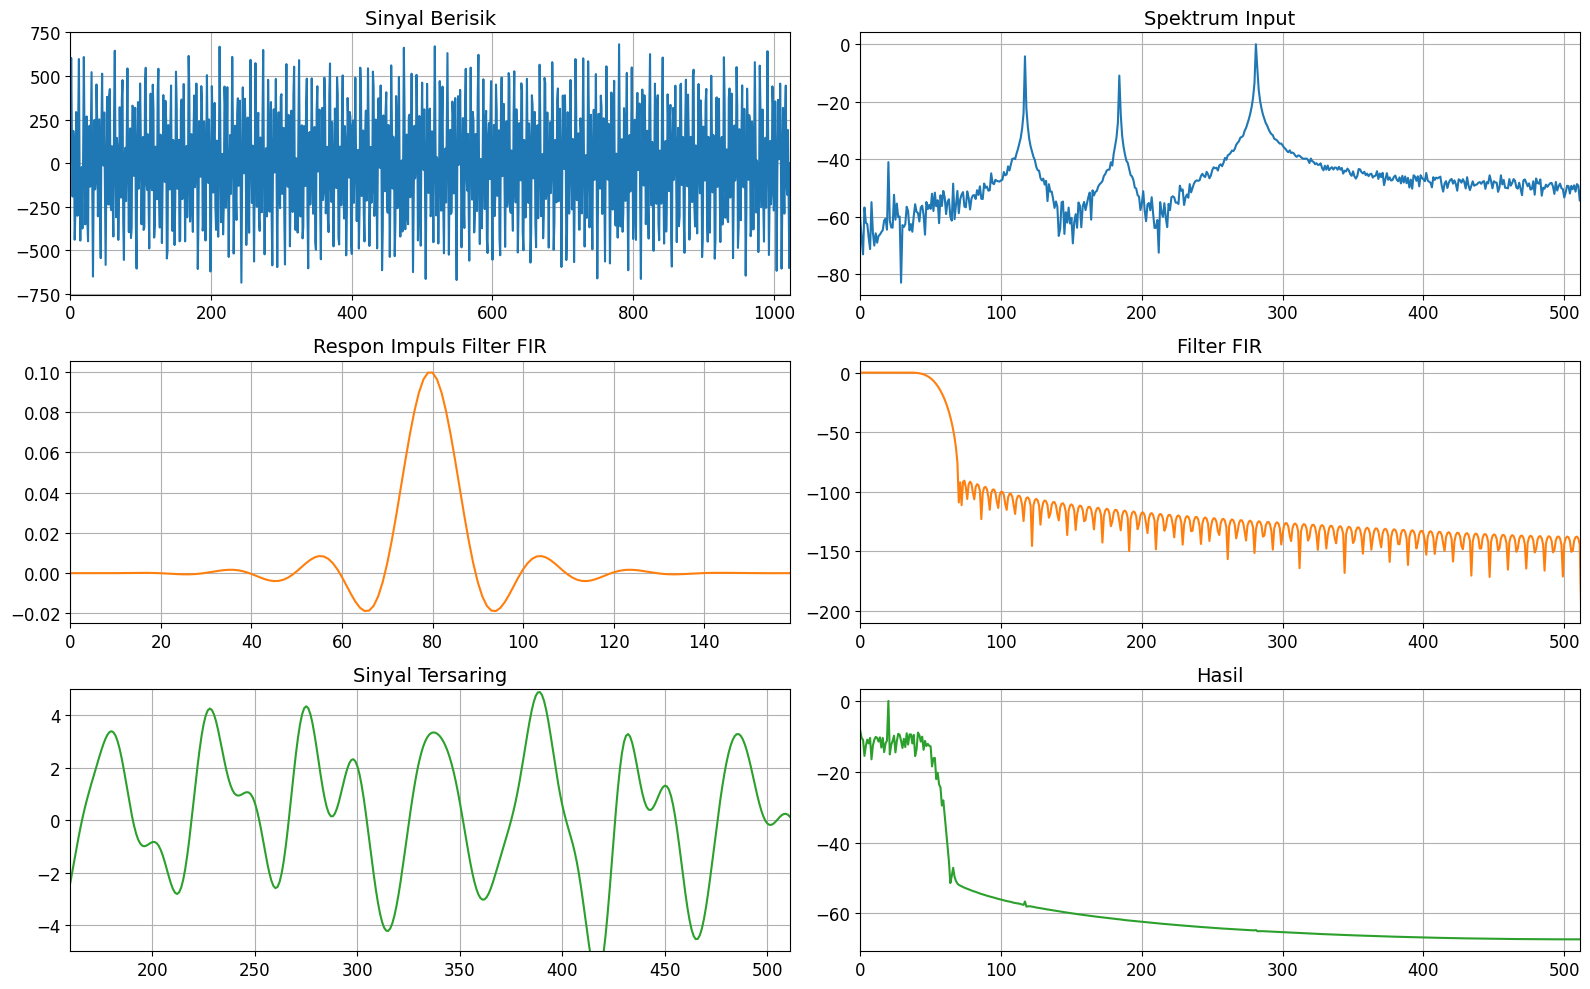

In [9]:
# Jumlah sampel sinyal input
N = 1024

# Membuat sinyal input
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Menambahkan noise putih
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Desain filter FIR Kaiser
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))

# Filtering sinyal input menggunakan filter FIR
y = lfilter(h, 1, xn)

# List sinyal input
lst_sig = [xn, h, y]

# Judul untuk setiap sinyal dan FFT
sig_titles = ['Sinyal Berisik', 'Respon Impuls Filter FIR', 'Sinyal Tersaring']
fft_titles = ['Spektrum Input', 'Filter FIR', 'Hasil']

# Membuat plot
plt.figure(figsize=(16, 10))
for i in range(3):
    # Menghitung FFT
    clc_fft = np.abs(fft(lst_sig[i], N))
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))

    # Plot sinyal
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)

    # Plot FFT
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Grafik-grafik yang ada di atas menampilkan beberapa analisis sinyal, termasuk sinyal asli yang berisik, spektrum sinyal input, respons filter FIR, dan hasil akhir setelah melalui proses penyaringan dengan filter FIR. Berikut adalah penjelasan masing-masing grafik secara detail:

1. **Sinyal Berisik (Kiri Atas)**:
   - **Deskripsi**: Grafik ini menunjukkan sinyal asli yang mendapatkan banyak gangguan atau noise. Amplitudo sinyal sangat bervariasi karena adanya noise.
   - **Fungsi**: Mengilustrasikan bagaimana sinyal asli terpengaruhi oleh noise yang ada.

2. **Spektrum Input (Kanan Atas)**:
   - **Deskripsi**: Menampilkan spektrum frekuensi dari sinyal input. Puncak-puncak frekuensi dapat diidentifikasi dari grafik ini.
   - **Fungsi**: Menunjukkan distribusi energi sinyal pada berbagai frekuensi, membantu dalam analisis frekuensi yang dominan dalam sinyal.

3. **Respons Impuls Filter FIR (Kiri Tengah)**:
   - **Deskripsi**: Ini adalah respons impuls dari filter Finite Impulse Response (FIR). Grafik ini menunjukkan respon output filter terhadap input yang berupa impuls.
   - **Fungsi**: Menggambarkan karakteristik waktu dari filter FIR, menjelaskan bagaimana filter merespons sinyal impuls unit.

4. **Filter FIR (Kanan Tengah)**:
   - **Deskripsi**: Menunjukkan koefisien dari filter FIR yang digunakan. Distribusi nilai koefisien ini menunjukkan desain dari filter tersebut.
   - **Fungsi**: Memberikan pemahaman tentang bagaimana filter FIR diimplementasikan melalui nilai-nilai koefisiennya.

5. **Sinyal Tersaring (Kiri Bawah)**:
   - **Deskripsi**: Grafik ini menunjukkan sinyal setelah melewati filter FIR. Amplitudo bervariasi tetapi noise sudah teredam.
   - **Fungsi**: Mengilustrasikan hasil akhir dari sinyal setelah diolah oleh filter FIR, menunjukkan perbaikan dari sinyal asli berisik.

6. **Hasil (Kanan Bawah)**:
   - **Deskripsi**: Sinyal hasil akhir setelah proses penyaringan dan penyesuaian lebih lanjut. Terlihat lebih bersih dan noise sudah berkurang signifikan.
   - **Fungsi**: Menunjukkan hasil akhir dari seluruh proses filter dan memperlihatkan peningkatan kualitas sinyal.

Grafik-grafik ini secara kolektif menggambarkan tahapan analisis dan filtering dari sinyal asli yang berisik, menampilkan transformasi dari sinyal awal hingga hasil akhirnya setelah proses filtering.
